In [112]:
import pandas as pd
import sqlite3 as sql
import datetime as dt
import uuid
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr

1. score metrics

ERD
game_dim
game_reports
player_dim
game_rankings (game_uuid, player_id, rank)
current_scores_view

In [169]:
games_df = pd.read_csv('game_reports.csv', parse_dates=[2,3])
games_df['players'] = games_df['players'].apply(lambda x: x.split(" "))
games_df['player_count'] = games_df['players'].apply(lambda x: len(x))
games_df['game_length'] = games_df['game_end'] - games_df['game_start']
games_df['game_length_minutes'] = games_df['game_length'].dt.total_seconds()/60

player_games_df = games_df.explode('players')
player_games_df['place'] = player_games_df.groupby(['game_played', 'game_start'])['players'].expanding().count().values

In [170]:
games_df['game_end'] - games_df['game_start']

0    0 days 00:36:00
1    0 days 01:55:00
2    0 days 01:00:00
3    0 days 00:30:00
4    0 days 01:30:00
5    0 days 03:10:00
6    0 days 00:30:00
7    0 days 03:53:00
8    0 days 01:00:00
9    0 days 02:18:00
10   0 days 00:30:00
11   0 days 00:30:00
12   0 days 01:30:00
13   0 days 01:43:00
14   0 days 00:22:00
dtype: timedelta64[ns]

In [171]:
player_games_df

,game_played,players,game_start,game_end,player_count,game_length,game_length_minutes,place
0,Revolution,Scoggins,2022-12-20 09:40:00,2022-12-20 10:16:00,3,0 days 00:36:00,36.0,1.0
0,Revolution,Zack,2022-12-20 09:40:00,2022-12-20 10:16:00,3,0 days 00:36:00,36.0,2.0
0,Revolution,Max,2022-12-20 09:40:00,2022-12-20 10:16:00,3,0 days 00:36:00,36.0,3.0
1,Quacks,Celeste,2022-12-20 09:45:00,2022-12-20 11:40:00,4,0 days 01:55:00,115.0,4.0
1,Quacks,Brenna,2022-12-20 09:45:00,2022-12-20 11:40:00,4,0 days 01:55:00,115.0,1.0
1,Quacks,OtherJohn,2022-12-20 09:45:00,2022-12-20 11:40:00,4,0 days 01:55:00,115.0,2.0
1,Quacks,Hamen,2022-12-20 09:45:00,2022-12-20 11:40:00,4,0 days 01:55:00,115.0,1.0
2,Netrunner,Skylar,2022-12-20 10:00:00,2022-12-20 11:00:00,2,0 days 01:00:00,60.0,2.0
2,Netrunner,Preston,2022-12-20 10:00:00,2022-12-20 11:00:00,2,0 days 01:00:00,60.0,3.0
3,Hive,Preston,2022-12-20 11:10:00,2022-12-20 11:40:00,2,0 days 00:30:00,30.0,4.0


In [172]:
games_df = pd.read_csv('game_reports.csv', parse_dates=[2,3])
games_df['players'] = games_df['players'].apply(lambda x: x.split(" "))
games_df['player_count'] = games_df['players'].apply(lambda x: len(x))
games_df['game_length'] = games_df['game_end'] - games_df['game_start']
games_df['game_length_minutes'] = games_df['game_length'].dt.total_seconds()/60

player_games_df = games_df.explode('players')
player_games_df['place'] = player_games_df.groupby(['game_played', 'game_start'], sort=False)['players'].expanding().count().values
#t * (1+((1-p)/(2n-2))) where t = time, p = place order, and n = # of players
t = player_games_df['game_length_minutes']
p = player_games_df['place']
n = player_games_df['player_count']
player_games_df['score'] = np.round(t * (1+((1-p)/(2*n-2))))
player_games_df


,game_played,players,game_start,game_end,player_count,game_length,game_length_minutes,place,score
0,Revolution,Scoggins,2022-12-20 09:40:00,2022-12-20 10:16:00,3,0 days 00:36:00,36.0,1.0,36.0
0,Revolution,Zack,2022-12-20 09:40:00,2022-12-20 10:16:00,3,0 days 00:36:00,36.0,2.0,27.0
0,Revolution,Max,2022-12-20 09:40:00,2022-12-20 10:16:00,3,0 days 00:36:00,36.0,3.0,18.0
1,Quacks,Celeste,2022-12-20 09:45:00,2022-12-20 11:40:00,4,0 days 01:55:00,115.0,1.0,115.0
1,Quacks,Brenna,2022-12-20 09:45:00,2022-12-20 11:40:00,4,0 days 01:55:00,115.0,2.0,96.0
1,Quacks,OtherJohn,2022-12-20 09:45:00,2022-12-20 11:40:00,4,0 days 01:55:00,115.0,3.0,77.0
1,Quacks,Hamen,2022-12-20 09:45:00,2022-12-20 11:40:00,4,0 days 01:55:00,115.0,4.0,58.0
2,Netrunner,Skylar,2022-12-20 10:00:00,2022-12-20 11:00:00,2,0 days 01:00:00,60.0,1.0,60.0
2,Netrunner,Preston,2022-12-20 10:00:00,2022-12-20 11:00:00,2,0 days 01:00:00,60.0,2.0,30.0
3,Hive,Preston,2022-12-20 11:10:00,2022-12-20 11:40:00,2,0 days 00:30:00,30.0,1.0,30.0


<ipython-input-173-b60906187327>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = player_games_df.groupby('players')['game_length_minutes','score'].sum().sort_values(by='score', ascending=False).plot(kind='scatter',x='game_length_minutes', y='score', figsize=(15, 8))


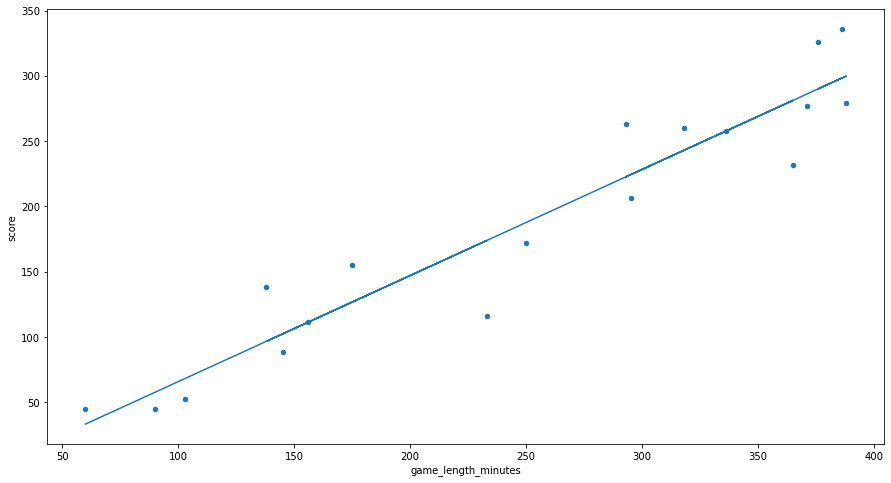

In [173]:
ax = player_games_df.groupby('players')['game_length_minutes','score'].sum().sort_values(by='score', ascending=False).plot(kind='scatter',x='game_length_minutes', y='score', figsize=(15, 8))
ax.plot(x,model.predict(x.reshape(-1,1)))

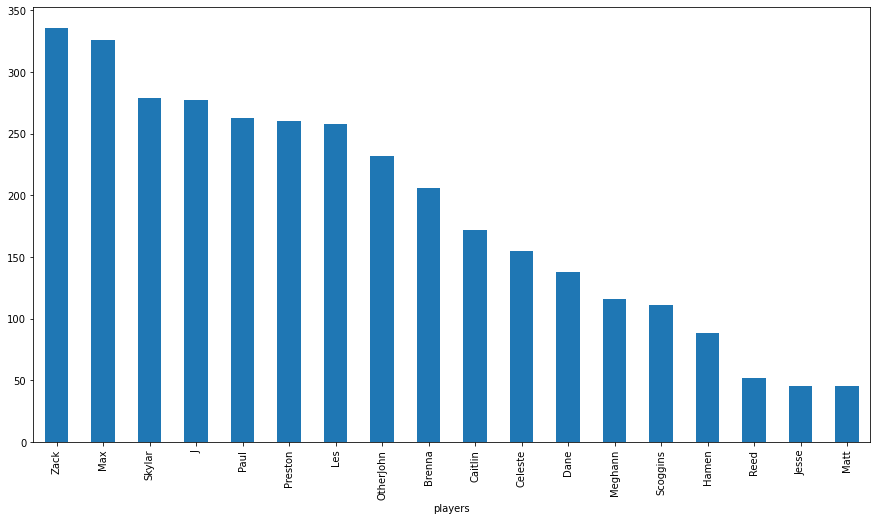

In [174]:
ranking = player_games_df.groupby('players')['score'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 8))

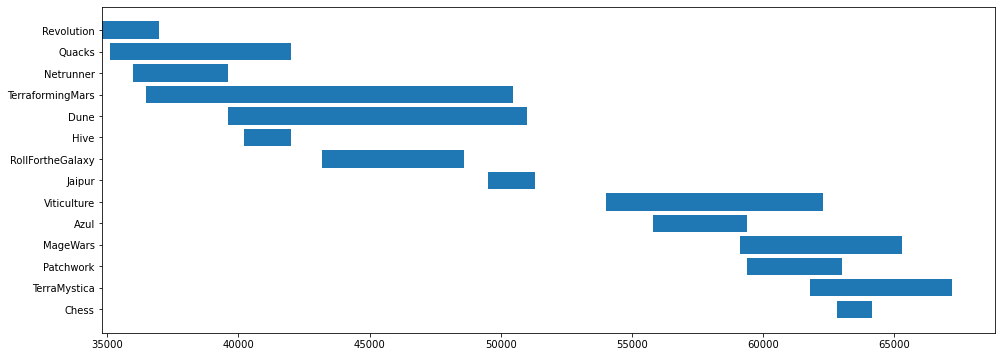

In [175]:
fig, ax = plt.subplots(1, figsize=(16,6))
gantt = games_df.sort_values(by='game_start', ascending=False)
ax.barh(gantt['game_played'], (gantt['game_end']-gantt['game_start']).dt.total_seconds(),left=gantt['game_start'].dt.hour*60*60+gantt['game_start'].dt.minute*60)
plt.show()

In [176]:
len(y-model.predict(x.reshape(-1,1)))

18

In [177]:
x = player_games_df.groupby('players')[['game_length_minutes','score']].sum().sort_values(by='score', ascending=False).values[:,0]
y = player_games_df.groupby('players')[['game_length_minutes','score']].sum().sort_values(by='score', ascending=False).values[:,1]
model = lr()
model.fit(x.reshape(-1,1),y)
pd.DataFrame(np.arange(0,18),y-model.predict(x.reshape(-1,1)))

,0
37.804233,0
35.935908,1
-20.822103,2
-8.998254,3
40.428813,4
17.099625,5
0.462609,6
-49.119249,7
-18.197522,8
-15.604983,9


<AxesSubplot:xlabel='0', ylabel='1'>

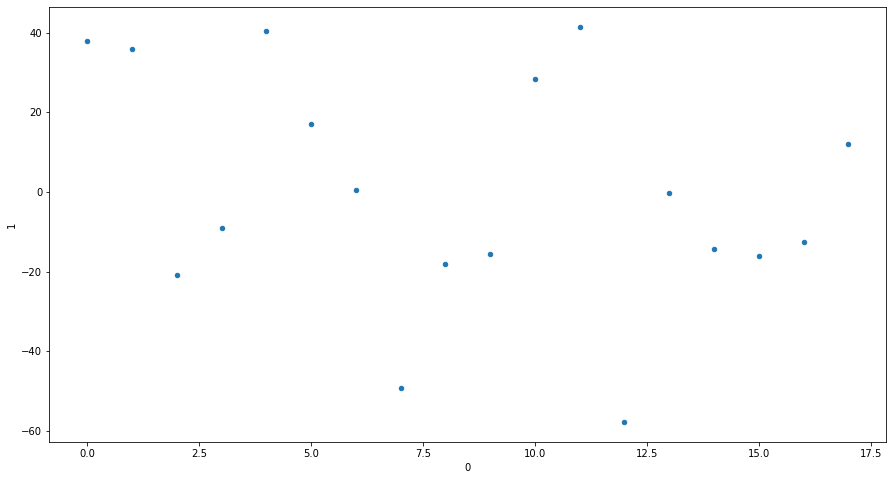

In [178]:
pd.DataFrame((np.arange(0,18),y-model.predict(x.reshape(-1,1)))).T.plot(kind='scatter',x=0, y=1, figsize=(15,8))

In [179]:
import scipy.stats as st
rng = np.random.default_rng()
st.kstest(y-model.predict(x.reshape(-1,1)),
             st.norm.cdf)

KstestResult(statistic=0.5, pvalue=0.00010984615735311917)

(array([2., 0., 0., 2., 5., 2., 0., 2., 1., 4.]),
 array([-57.78113443, -47.85604283, -37.93095124, -28.00585964,
        -18.08076805,  -8.15567645,   1.76941514,  11.69450674,
         21.61959833,  31.54468993,  41.46978152]),
 <BarContainer object of 10 artists>)

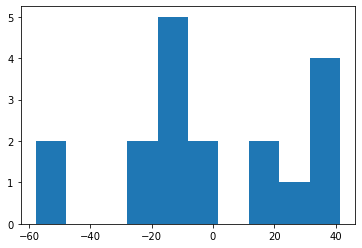

In [180]:
plt.hist(y-model.predict(x.reshape(-1,1)))

In [181]:
x = player_games_df.groupby('players')[['game_length_minutes','score']].sum().sort_values(by='score', ascending=False).values[:,0]

In [5]:
game = ('Dune Imperium', ('Les', 'Zack', 'Paul', 'Skylar'), '2022/12/1 13:00:00', '2022/12/1 15:25:00')
game_uuid = str(uuid.uuid4())
game_list = [(game_uuid, game[0], place, player, game[2], game[3]) for place, player in enumerate(game[1])]

In [6]:
pd.DataFrame(game_list, columns=['game_id', 'game_played', 'player', 'place_order', 'game_start', 'game_end'])

,game_id,game_played,player,place_order,game_start,game_end
0,015cc072-417b-463f-b12f-b4147f3f02d4,Dune Imperium,0,Les,2022/12/1 13:00:00,2022/12/1 15:25:00
1,015cc072-417b-463f-b12f-b4147f3f02d4,Dune Imperium,1,Zack,2022/12/1 13:00:00,2022/12/1 15:25:00
2,015cc072-417b-463f-b12f-b4147f3f02d4,Dune Imperium,2,Paul,2022/12/1 13:00:00,2022/12/1 15:25:00
3,015cc072-417b-463f-b12f-b4147f3f02d4,Dune Imperium,3,Skylar,2022/12/1 13:00:00,2022/12/1 15:25:00


In [7]:
con = sql.connect("tutorial.db")

In [8]:
cur = con.cursor()

In [9]:
cur.execute("CREATE TABLE game_reports(game_id, game_played, player, place_order, game_start, game_end)")

OperationalError: table game_reports already exists

In [10]:
res = cur.execute("select * from sqlite_master")

In [11]:
res.fetchall()

[('table',
  'game_reports',
  'game_reports',
  3,
  'CREATE TABLE game_reports(game_id, game_played, player, place_order, game_start, game_end)')]

In [43]:
game1 = pd.DataFrame(game_list, columns=['game_id', 'game_played', 'player', 'place_order', 'game_start', 'game_end'])

In [52]:
game1.to_sql('game_reports', con, if_exists='append', index=False, method='multi')

4

In [53]:
res = cur.execute("select * from game_reports")
res.fetchall()

[('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  0,
  'Les',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00'),
 ('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  1,
  'Zack',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00'),
 ('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  2,
  'Paul',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00'),
 ('e17eb5f1-f941-455a-b21a-7a9fb06fce81',
  'Dune Imperium',
  3,
  'Skylar',
  '2022/12/1 13:00:00',
  '2022/12/1 15:25:00')]